In [27]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
df_original = pd.read_csv('crimes.csv')
df_original

C:\Users\phrc_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,crime,number,date,location,beat,neighborhood,npu,lat,long
0,LARCENY-NON VEHICLE,103040029,10/31/2010,610 SPRING ST NW,509,Downtown,M,33.77101,-84.38895
1,AUTO THEFT,103040061,10/31/2010,850 OAK ST SW,401,West End,T,33.74057,-84.41680
2,LARCENY-FROM VEHICLE,103040169,10/31/2010,1344 METROPOLITAN PKWY SW,301,Capitol View Manor,X,33.71803,-84.40774
3,AUTO THEFT,103040174,10/31/2010,1752 PRYOR RD SW,307,Betmar LaVilla,Y,33.70731,-84.39674
4,LARCENY-NON VEHICLE,103040301,10/31/2010,JOHN WESLEY DOBBS AVE NE / CORLEY ST NE,604,Old Fourth Ward,M,33.75947,-84.36626
...,...,...,...,...,...,...,...,...,...
270683,BURGLARY-RESIDENCE,92442142,09/01/2009,1226 PORTLAND AVE SE,612,East Atlanta,W,33.73927,-84.34741
270684,LARCENY-FROM VEHICLE,92442164,09/01/2009,317 PICKFAIR WAY SW,307,Lakewood Heights,Y,33.70436,-84.40013
270685,LARCENY-NON VEHICLE,92448045,09/01/2009,6234 SPINE RD @ATRIUM,50,NaN,NaN,33.64068,-84.44204
270686,LARCENY-NON VEHICLE,92440866,09/01/2009,30 WARREN ST,610,Kirkwood,O,33.75374,-84.32600


In [14]:
df_original.columns

Index(['crime', 'number', 'date', 'location', 'beat', 'neighborhood', 'npu',
       'lat', 'long'],
      dtype='object')

In [3]:
df_copia = df_original.copy(deep = True)
df_copia

,crime,number,date,location,beat,neighborhood,npu,lat,long
0,LARCENY-NON VEHICLE,103040029,10/31/2010,610 SPRING ST NW,509,Downtown,M,33.77101,-84.38895
1,AUTO THEFT,103040061,10/31/2010,850 OAK ST SW,401,West End,T,33.74057,-84.41680
2,LARCENY-FROM VEHICLE,103040169,10/31/2010,1344 METROPOLITAN PKWY SW,301,Capitol View Manor,X,33.71803,-84.40774
3,AUTO THEFT,103040174,10/31/2010,1752 PRYOR RD SW,307,Betmar LaVilla,Y,33.70731,-84.39674
4,LARCENY-NON VEHICLE,103040301,10/31/2010,JOHN WESLEY DOBBS AVE NE / CORLEY ST NE,604,Old Fourth Ward,M,33.75947,-84.36626
...,...,...,...,...,...,...,...,...,...
270683,BURGLARY-RESIDENCE,92442142,09/01/2009,1226 PORTLAND AVE SE,612,East Atlanta,W,33.73927,-84.34741
270684,LARCENY-FROM VEHICLE,92442164,09/01/2009,317 PICKFAIR WAY SW,307,Lakewood Heights,Y,33.70436,-84.40013
270685,LARCENY-NON VEHICLE,92448045,09/01/2009,6234 SPINE RD @ATRIUM,50,NaN,NaN,33.64068,-84.44204
270686,LARCENY-NON VEHICLE,92440866,09/01/2009,30 WARREN ST,610,Kirkwood,O,33.75374,-84.32600


In [5]:
# Converte a coluna "data" para o tipo datetime
df_copia['date'] = pd.to_datetime(df_copia['date'])


In [19]:
# Filtrar os dados para o período desejado (2015 a 2017)
df_filtered = df_copia[(df_copia['date'].dt.year <= 2015)]


In [23]:
# Selecionar as variáveis independentes (X) e a variável dependente (y)
X = df_filtered[['location', 'beat', 'neighborhood', 'npu', 'lat', 'long']]
Y = df_filtered['number']



In [28]:
# Filtrar os dados para o período desejado
df_filtered = df_copia[(df_copia['date'].dt.year < 2015)]

# Selecionar as variáveis independentes (X) e a variável dependente (y)
X = df_filtered[['location', 'beat', 'neighborhood', 'npu', 'lat', 'long']]
y = df_filtered['number']

# Realizar codificação one-hot nas colunas categóricas
categorical_cols = ['location', 'beat', 'neighborhood', 'npu']
preprocessor = ColumnTransformer([('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_encoded = preprocessor.fit_transform(X)

# Inicializar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_encoded, y)

# Criar um DataFrame com as datas de 2015 a 2017
dates = pd.date_range(start='2015-01-01', end='2017-12-31', freq='D')
df_predict = pd.DataFrame({'date': dates})

# Extrair as mesmas variáveis independentes para o período de previsão
X_predict = df_predict[['location', 'beat', 'neighborhood', 'npu', 'lat', 'long']]
X_predict_encoded = preprocessor.transform(X_predict)

# Realizar previsões para o período de 2015 a 2017
predictions = model.predict(X_predict_encoded)

# Adicionar as previsões ao DataFrame
df_predict['predictions'] = predictions

# Imprimir o DataFrame com as previsões
print(df_predict)


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [24]:
# Inicializar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X, Y)

ValueError: could not convert string to float: '610 SPRING ST NW'

In [ ]:
# Criar um DataFrame com as datas de 2015 a 2017
dates = pd.date_range(start='2015-01-01', end='2017-12-31', freq='D')
df_predict = pd.DataFrame({'date': dates})

# Extrair as mesmas variáveis independentes para o período de previsão
X_predict = df_predict[['location', 'beat', 'neighborhood', 'npu', 'lat', 'long']]

# Realizar previsões para o período de 2015 a 2017
predictions = model.predict(X_predict)

# Adicionar as previsões ao DataFrame
df_predict['predictions'] = predictions

# Imprimir o DataFrame com as previsões
print(df_predict)


In [6]:
FiltroSem2017 = df_copia.loc[df_copia['date'].dt.year < 2016]
FiltroSem

,crime,number,date,location,beat,neighborhood,npu,lat,long
0,LARCENY-NON VEHICLE,103040029,2010-10-31,610 SPRING ST NW,509,Downtown,M,33.77101,-84.38895
1,AUTO THEFT,103040061,2010-10-31,850 OAK ST SW,401,West End,T,33.74057,-84.41680
2,LARCENY-FROM VEHICLE,103040169,2010-10-31,1344 METROPOLITAN PKWY SW,301,Capitol View Manor,X,33.71803,-84.40774
3,AUTO THEFT,103040174,2010-10-31,1752 PRYOR RD SW,307,Betmar LaVilla,Y,33.70731,-84.39674
4,LARCENY-NON VEHICLE,103040301,2010-10-31,JOHN WESLEY DOBBS AVE NE / CORLEY ST NE,604,Old Fourth Ward,M,33.75947,-84.36626
...,...,...,...,...,...,...,...,...,...
270683,BURGLARY-RESIDENCE,92442142,2009-09-01,1226 PORTLAND AVE SE,612,East Atlanta,W,33.73927,-84.34741
270684,LARCENY-FROM VEHICLE,92442164,2009-09-01,317 PICKFAIR WAY SW,307,Lakewood Heights,Y,33.70436,-84.40013
270685,LARCENY-NON VEHICLE,92448045,2009-09-01,6234 SPINE RD @ATRIUM,50,NaN,NaN,33.64068,-84.44204
270686,LARCENY-NON VEHICLE,92440866,2009-09-01,30 WARREN ST,610,Kirkwood,O,33.75374,-84.32600


In [7]:
FiltroSem2017['mes_ano'] = FiltroSem2017['date'].dt.strftime('%m/%Y')
FiltroSem2017['mes_ano'] = pd.to_datetime(FiltroSem2017['mes_ano'], format='%m/%Y')
FiltroSem2017

C:\Users\phrc_\AppData\Local\Temp/ipykernel_7956/2310507825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FiltroSem2017['mes_ano'] = FiltroSem2017['date'].dt.strftime('%m/%Y')
C:\Users\phrc_\AppData\Local\Temp/ipykernel_7956/2310507825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FiltroSem2017['mes_ano'] = pd.to_datetime(FiltroSem2017['mes_ano'], format='%m/%Y')


,crime,number,date,location,beat,neighborhood,npu,lat,long,mes_ano
0,LARCENY-NON VEHICLE,103040029,2010-10-31,610 SPRING ST NW,509,Downtown,M,33.77101,-84.38895,2010-10-01
1,AUTO THEFT,103040061,2010-10-31,850 OAK ST SW,401,West End,T,33.74057,-84.41680,2010-10-01
2,LARCENY-FROM VEHICLE,103040169,2010-10-31,1344 METROPOLITAN PKWY SW,301,Capitol View Manor,X,33.71803,-84.40774,2010-10-01
3,AUTO THEFT,103040174,2010-10-31,1752 PRYOR RD SW,307,Betmar LaVilla,Y,33.70731,-84.39674,2010-10-01
4,LARCENY-NON VEHICLE,103040301,2010-10-31,JOHN WESLEY DOBBS AVE NE / CORLEY ST NE,604,Old Fourth Ward,M,33.75947,-84.36626,2010-10-01
...,...,...,...,...,...,...,...,...,...,...
270683,BURGLARY-RESIDENCE,92442142,2009-09-01,1226 PORTLAND AVE SE,612,East Atlanta,W,33.73927,-84.34741,2009-09-01
270684,LARCENY-FROM VEHICLE,92442164,2009-09-01,317 PICKFAIR WAY SW,307,Lakewood Heights,Y,33.70436,-84.40013,2009-09-01
270685,LARCENY-NON VEHICLE,92448045,2009-09-01,6234 SPINE RD @ATRIUM,50,NaN,NaN,33.64068,-84.44204,2009-09-01
270686,LARCENY-NON VEHICLE,92440866,2009-09-01,30 WARREN ST,610,Kirkwood,O,33.75374,-84.32600,2009-09-01


In [8]:
CrimesMY = FiltroSem2017.groupby(FiltroSem2017['mes_ano'])['crime'].count()
CrimesMY = CrimesMY.reset_index()
CrimesMY

,mes_ano,crime
0,2009-01-01,3537
1,2009-02-01,2671
2,2009-03-01,3048
3,2009-04-01,3089
4,2009-05-01,3375
...,...,...
91,2016-08-01,2724
92,2016-09-01,2668
93,2016-10-01,2664
94,2016-11-01,2219


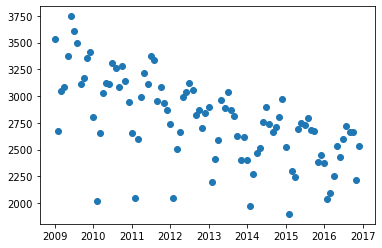

In [9]:
plt.scatter(CrimesMY['mes_ano'],CrimesMY['crime'])

In [10]:
from sklearn.linear_model import LinearRegression

# Supondo que você tenha um DataFrame chamado "dados" com as colunas "mês" e "quantidade de crimes"

# Preparar os dados para a regressão linear
X = CrimesMY['mes_ano'].values.reshape(-1, 1)  # Variável independente (mês)
y = CrimesMY['crime'].values  # Variável dependente (quantidade de crimes)

# Criar o objeto de regressão linear
regressor = LinearRegression()

# Ajustar o modelo aos dados
regressor.fit(X, y)

LinearRegression()

In [11]:
# Prever a quantidade de crimes para o ano de 2017
ano_janeiro_2017 = '01/01/2017'  # Ano de janeiro de 2017
ano_janeiro_2017.dt.strftime('%m/%Y')
ano_janeiro_2017 = pd.to_datetime(ano_janeiro_2017, format='%m/%Y')
quantidade_prevista = regressor.predict([[ano_janeiro_2017]])

# Exibir a quantidade prevista de crimes para o ano de 2017
print("Quantidade prevista de crimes para o ano de 2017:", quantidade_prevista)

AttributeError: 'str' object has no attribute 'dt'

In [12]:
df_copia['mes_ano'] = df_copia['date'].dt.strftime('%m/%Y')
df_copia['mes_ano'] = pd.to_datetime(df_copia['mes_ano'], format='%m/%Y')
df_copia

,crime,number,date,location,beat,neighborhood,npu,lat,long,mes_ano
0,LARCENY-NON VEHICLE,103040029,2010-10-31,610 SPRING ST NW,509,Downtown,M,33.77101,-84.38895,2010-10-01
1,AUTO THEFT,103040061,2010-10-31,850 OAK ST SW,401,West End,T,33.74057,-84.41680,2010-10-01
2,LARCENY-FROM VEHICLE,103040169,2010-10-31,1344 METROPOLITAN PKWY SW,301,Capitol View Manor,X,33.71803,-84.40774,2010-10-01
3,AUTO THEFT,103040174,2010-10-31,1752 PRYOR RD SW,307,Betmar LaVilla,Y,33.70731,-84.39674,2010-10-01
4,LARCENY-NON VEHICLE,103040301,2010-10-31,JOHN WESLEY DOBBS AVE NE / CORLEY ST NE,604,Old Fourth Ward,M,33.75947,-84.36626,2010-10-01
...,...,...,...,...,...,...,...,...,...,...
270683,BURGLARY-RESIDENCE,92442142,2009-09-01,1226 PORTLAND AVE SE,612,East Atlanta,W,33.73927,-84.34741,2009-09-01
270684,LARCENY-FROM VEHICLE,92442164,2009-09-01,317 PICKFAIR WAY SW,307,Lakewood Heights,Y,33.70436,-84.40013,2009-09-01
270685,LARCENY-NON VEHICLE,92448045,2009-09-01,6234 SPINE RD @ATRIUM,50,NaN,NaN,33.64068,-84.44204,2009-09-01
270686,LARCENY-NON VEHICLE,92440866,2009-09-01,30 WARREN ST,610,Kirkwood,O,33.75374,-84.32600,2009-09-01


In [13]:
Filtro2017 = df_copia.loc[df_copia['mes_ano'] == '2017-01']
Filtro2017['crime'].count()

2222